# Floresta Aleatória (Random Forest)

A classificação por floresta aleatória é uma técnica de aprendizado de máquina que combina o poder da aleatoriedade com o poder da média para construir um modelo robusto de classificação. Ela opera criando múltiplas árvores de decisão durante o treinamento e fazendo previsões com base na maioria das previsões das árvores individuais.

## Principais Características:
- **Árvores de Decisão:** Cada árvore na floresta é construída a partir de uma amostra aleatória do conjunto de dados de treinamento. Isso ajuda a reduzir a correlação entre as árvores individuais, tornando o modelo mais robusto.

- **Amostragem Aleatória de Características:** Durante a construção de cada árvore, apenas um subconjunto aleatório das características é considerado para dividir em cada nó da árvore. Isso introduz mais diversidade nas árvores e reduz a probabilidade de overfitting.

- **Votação por Maioria:** Ao fazer previsões, cada árvore na floresta contribui com uma votação para determinar a classe final de um exemplo. A classe mais frequente entre todas as árvores é escolhida como a previsão final.

## Vantagens:
- **Robustez:** Averiguando várias árvores de decisão, o modelo é menos propenso a overfitting e tem uma melhor capacidade de generalização em dados de teste.

- **Manuseio de Dados Não Lineares e de Alta Dimensão:** Pode lidar eficazmente com conjuntos de dados com muitas características e interações complexas entre elas.

- **Fácil de Usar:** Requer pouca ou nenhuma sintonia de parâmetros e lida bem com dados ausentes.

## Limitações:
- **Interpretabilidade:** Às vezes, a floresta aleatória pode ser difícil de interpretar em comparação com modelos lineares simples.

- **Desempenho em Dados Escaláveis:** Para conjuntos de dados muito grandes, o treinamento de uma floresta aleatória pode se tornar computacionalmente caro.

## Aplicações:
- **Classificação:** Prever a classe de um exemplo com base em suas características.

A implementação da classificação por floresta aleatória no scikit-learn, utilizando RandomForestClassifier, oferece uma interface simples e poderosa para treinar e fazer previsões com este modelo.

# Parâmetros do `RandomForestClassifier` do scikit-learn:

1. `n_estimators`: O número de árvores na floresta.

2. `criterion`: A função para medir a qualidade de uma divisão. Pode ser "gini" para o índice de Gini ou "entropy" para o ganho de informação.

3. `max_depth`: A profundidade máxima de cada árvore na floresta.

4. `min_samples_split`: O número mínimo de amostras necessárias para dividir um nó interno.

5. `min_samples_leaf`: O número mínimo de amostras necessárias para estar em um nó folha.

6. `min_weight_fraction_leaf`: A fração mínima ponderada do total de pesos das amostras de entrada necessárias para estar em um nó folha.

7. `max_features`: O número de features a serem consideradas ao procurar a melhor divisão. Pode ser um inteiro, "sqrt", "log2" ou uma fração do total de features.

8. `max_leaf_nodes`: O número máximo de folhas permitidas em cada árvore.

9. `min_impurity_decrease`: Um nó será dividido se essa divisão induzir uma diminuição da impureza maior ou igual a esse valor.

10. `bootstrap`: Se deve amostrar com reposição ao construir árvores.

11. `oob_score`: Se deve usar out-of-bag amostras para estimar o erro de generalização.

12. `n_jobs`: O número de jobs a serem executados em paralelo para ajustar árvores.

13. `random_state`: Determina a semente usada pelo gerador de números aleatórios para garantir que os resultados sejam reproduzíveis.

14. `verbose`: Controla a verbosidade da saída durante o ajuste.

15. `warm_start`: Se definido como True, reutiliza a solução da chamada anterior para ajustar e adiciona mais árvores à floresta existente.

16. `class_weight`: Peso associado a cada classe. Pode ser "balanced" para ajustar automaticamente os pesos das classes inversamente proporcionais às frequências das classes.

# Parâmetros do `RandomForestRegressor` do scikit-learn:

1. `n_estimators`: O número de árvores na floresta.

2. `criterion`: A função para medir a qualidade de uma divisão. Pode ser "mse" para o erro médio quadrático ou "mae" para o erro absoluto médio.

3. `max_depth`: A profundidade máxima de cada árvore na floresta.

4. `min_samples_split`: O número mínimo de amostras necessárias para dividir um nó interno.

5. `min_samples_leaf`: O número mínimo de amostras necessárias para estar em um nó folha.

6. `min_weight_fraction_leaf`: A fração mínima ponderada do total de pesos das amostras de entrada necessárias para estar em um nó folha.

7. `max_features`: O número de features a serem consideradas ao procurar a melhor divisão. Pode ser um inteiro, "sqrt", "log2" ou uma fração do total de features.

8. `max_leaf_nodes`: O número máximo de folhas permitidas em cada árvore.

9. `min_impurity_decrease`: Um nó será dividido se essa divisão induzir uma diminuição da impureza maior ou igual a esse valor.

10. `bootstrap`: Se deve amostrar com reposição ao construir árvores.

11. `oob_score`: Se deve usar out-of-bag amostras para estimar o erro de generalização.

12. `n_jobs`: O número de jobs a serem executados em paralelo para ajustar árvores.

13. `random_state`: Determina a semente usada pelo gerador de números aleatórios para garantir que os resultados sejam reproduzíveis.

14. `verbose`: Controla a verbosidade da saída durante o ajuste.

15. `warm_start`: Se definido como True, reutiliza a solução da chamada anterior para ajustar e adiciona mais árvores à floresta existente.

16. `ccp_alpha`: Parâmetro de complexidade de custo mínimo para poda de custo-complexidade.

Importando bibliotecas

In [1]:
import gsidiag as gd
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np

In [2]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import confusion_matrix, classification_report

from mpl_toolkits.axes_grid1 import make_axes_locatable

from itertools import combinations
from itertools import cycle
import seaborn as sns

import geopandas as gpd


Definindo parâmetros para o uso do readDiag

In [3]:
#DIRdiag = "/home/patrick/readDiag/data"
DIRdiag = "/mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout"
#D:\ftp1.cptec.inpe.br\pesquisa\das\joao.gerd\EXP18\GSI\dataout
varName = "amsua"
varType = "n15"
dateIni="2020010100" 
dateFin="2020010206" 
nHour = "6"          
vminOMA = -2.0       
vmaxOMA = 2.0        
vminSTD = 0.0        
vmaxSTD = 14.0       
Level = 1000
Lay = None           
SingleL = "All" 

datei = datetime.strptime(str(dateIni), "%Y%m%d%H")
datef = datetime.strptime(str(dateFin), "%Y%m%d%H")
dates = [dates.strftime('%Y%m%d%H') for dates in pd.date_range(datei, datef,freq="6H").tolist()]

print(dates)


['2020010100', '2020010106', '2020010112', '2020010118', '2020010200', '2020010206']


Encontrando e listando arquivos para serem usados

In [4]:
paths, pathsc = [], []

OuterL = "01"        
[paths.append(DIRdiag+"/"+dt+"/diag_amsua_n15_"+OuterL+"."+dt) for dt in dates]

OuterLc = "03"
[pathsc.append(DIRdiag+"/"+dt+"/diag_amsua_n15_"+OuterLc+"."+dt) for dt in dates]

print(paths)
print("")
print(pathsc)

['/mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010100/diag_amsua_n15_01.2020010100', '/mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010106/diag_amsua_n15_01.2020010106', '/mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010112/diag_amsua_n15_01.2020010112', '/mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010118/diag_amsua_n15_01.2020010118', '/mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010200/diag_amsua_n15_01.2020010200', '/mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010206/diag_amsua_n15_01.2020010206']

['/mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010100/diag_amsua_n15_03.2020010100', '/mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010106/diag_amsua_n15_03.2020010106', '/mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010112/diag_amsua_n15_03.2020010112', '/mnt/d

Lendo arquivos listado usando o readDiag e concatenando os dados

In [5]:
# Define uma variável booleana 'read' como True para indicar que a leitura dos arquivos será realizada
read = True

# Verifica se 'read' é True para prosseguir com a leitura dos arquivos
if read:        
    # Inicializa uma lista vazia para armazenar os objetos gdf
    gdf_list = []
    # Imprime uma mensagem informando o tempo estimado necessário para a leitura dos arquivos
    print("")
    print("Aguarde, o tempo total estimado para a leitura dos arquivos é de "+
          str(int((float(len(paths))*20 )/60))+" minutos e "+
          str(int((float(len(paths))*20 )%60))+" segundos.")
    print("")
    # Itera sobre os caminhos dos arquivos e seus caminhos de configuração correspondentes
    for path, pathc in zip(paths,pathsc):
        # Imprime uma mensagem indicando o arquivo que está sendo lido
        print("Reading "+path)
        # Lê o arquivo usando a função read_diag do módulo gsidiag e armazena o objeto retornado em gdf
        gdf = gd.read_diag(path,pathc)
        # Adiciona o objeto gdf à lista gdf_list
        gdf_list.append(gdf)

    # Imprime a lista de objetos gdf lidos
    print(gdf_list)
    
    # Define uma string separadora para uso posterior
    separator = " ====================================================================================================="



Aguarde, o tempo total estimado para a leitura dos arquivos é de 2 minutos e 0 segundos.

Reading /mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010100/diag_amsua_n15_01.2020010100
 
>>> GSI DIAG <<<
 
Reading /mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010106/diag_amsua_n15_01.2020010106
 
>>> GSI DIAG <<<
 
Reading /mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010112/diag_amsua_n15_01.2020010112
 
>>> GSI DIAG <<<
 
Reading /mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010118/diag_amsua_n15_01.2020010118
 
>>> GSI DIAG <<<
 
Reading /mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010200/diag_amsua_n15_01.2020010200
 
>>> GSI DIAG <<<
 
Reading /mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010206/diag_amsua_n15_01.2020010206
 
>>> GSI DIAG <<<
 
[<gsidiag.__main__.read_diag object at 0x7f9f3b1d19d0>, <gsidiag.__main__.read_diag object at

In [6]:
# Inicialização de DataFrame vazio para armazenar dados concatenados
df_concatenado2 = pd.DataFrame()

# Iteração sobre objetos em gdf_list
for objeto in gdf_list:
        
    print(separator)
    print("Separando dados do arquivo" + str(objeto._diagFile))
    
    # Criação de dicionário de dados a partir do objeto   
    dados_dict = {
            'lat': objeto.obsInfo[varName].loc[varType].lat,
            'lon': objeto.obsInfo[varName].loc[varType].lon,
            'elev': objeto.obsInfo[varName].loc[varType].elev,
            'nchan': objeto.obsInfo[varName].loc[varType].nchan,
            'time': objeto.obsInfo[varName].loc[varType].time,
            'iuse': objeto.obsInfo[varName].loc[varType].iuse,
            'idqc': objeto.obsInfo[varName].loc[varType].idqc,
            'inverr': objeto.obsInfo[varName].loc[varType].inverr,
            'oer': objeto.obsInfo[varName].loc[varType].oer,
            'obs': objeto.obsInfo[varName].loc[varType].obs,
            'omf': objeto.obsInfo[varName].loc[varType].omf,
            'omf_nobc': objeto.obsInfo[varName].loc[varType].omf_nobc,
            'emiss': objeto.obsInfo[varName].loc[varType].emiss,
            'oma': objeto.obsInfo[varName].loc[varType].oma,
            'oma_nobc': objeto.obsInfo[varName].loc[varType].oma_nobc,
            'imp': objeto.obsInfo[varName].loc[varType].imp,
            'dfs': objeto.obsInfo[varName].loc[varType].dfs
            }
        
    # Conversão do dicionário em DataFrame
    df_objeto = pd.DataFrame(dados_dict)
        
    # Concatenação do DataFrame do objeto com o DataFrame concatenado
    df_concatenado2 = pd.concat([df_concatenado2, df_objeto], ignore_index=True)
    

Separando dados do arquivo/mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010100/diag_amsua_n15_01.2020010100
Separando dados do arquivo/mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010106/diag_amsua_n15_01.2020010106
Separando dados do arquivo/mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010112/diag_amsua_n15_01.2020010112
Separando dados do arquivo/mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010118/diag_amsua_n15_01.2020010118
Separando dados do arquivo/mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010200/diag_amsua_n15_01.2020010200
Separando dados do arquivo/mnt/d/ftp1.cptec.inpe.br/pesquisa/das/joao.gerd/EXP18/GSI/dataout/2020010206/diag_amsua_n15_01.2020010206


In [7]:
# Remoção de linhas com valores NaN
df_concatenado2.dropna(inplace=True)

# Filtrando os canais sub-representados
df_concatenado2 = df_concatenado2[~df_concatenado2['nchan'].isin([1, 2, 3, 4, 5, 15])]

print(df_concatenado2)

print(separator)


# Define as classes do target discretizado para uso posterior
classes = ['6','7','8','9','10','12','13']

              lat         lon         elev  nchan      time  iuse  idqc  \
5      -87.504501   19.704599  2735.045410    6.0  0.315833  -1.0  -0.0   
6      -87.504501   19.704599  2735.045410    7.0  0.315833   1.0   0.0   
7      -87.504501   19.704599  2735.045410    8.0  0.315833   1.0   0.0   
8      -87.504501   19.704599  2735.045410    9.0  0.315833   1.0   0.0   
9      -87.504501   19.704599  2735.045410   10.0  0.315833   1.0   0.0   
...           ...         ...          ...    ...       ...   ...   ...   
697642  69.849403  359.350891    -0.074034    8.0  1.566111   1.0   0.0   
697643  69.849403  359.350891    -0.074034    9.0  1.566111   1.0   0.0   
697644  69.849403  359.350891    -0.074034   10.0  1.566111   1.0   0.0   
697646  69.849403  359.350891    -0.074034   12.0  1.566111   1.0   0.0   
697647  69.849403  359.350891    -0.074034   13.0  1.566111   1.0   0.0   

          inverr       oer         obs       omf  omf_nobc     emiss  \
5       3.557238  0.281441 

In [8]:
# Use pivot_table() para pivotar os dados
df_pivot2 = df_concatenado2.pivot_table(index=('lat', 'lon'), columns='nchan',
                                        values=('obs', 'oma', 'omf','imp', 'dfs'), aggfunc='mean')

# Resetando o índice para manter 'linha' como uma coluna
df_pivot2.reset_index(inplace=True)

# Remoção de linhas com valores NaN
df_pivot2.dropna(inplace=True)



# Lista de colunas que contêm os valores de DFS para cada canal
cols_dfs = [('dfs', 6.0), ('dfs', 7.0), ('dfs', 8.0), ('dfs', 9.0), ('dfs', 10.0), ('dfs', 12.0), ('dfs', 13.0)]

# Encontrar o canal com o maior valor de DFS em cada linha
df_pivot2['canal_maior_dfs'] = df_pivot2[cols_dfs].idxmax(axis=1).str[1]

# Encontre o nome da coluna com o maior valor em cada linha
max_dfs_column = df_pivot2['dfs'].max(axis=1)

# Crie uma nova coluna no DataFrame com a informação do maior dfs em cada linha
df_pivot2['maior_dfs'] = max_dfs_column




# Lista de colunas que contêm os valores de imp para cada canal
cols_imp = [('imp', 6.0), ('imp', 7.0), ('imp', 8.0), ('imp', 9.0), ('imp', 10.0), ('imp', 12.0), ('imp', 13.0)]

# Encontrar o canal com o maior valor de imp em cada linha
df_pivot2['canal_maior_imp'] = df_pivot2[cols_imp].idxmax(axis=1).str[1]

# Encontre o nome da coluna com o maior valor em cada linha
max_dfs_column = df_pivot2['imp'].max(axis=1)

# Crie uma nova coluna no DataFrame com a informação do maior dfs em cada linha
df_pivot2['maior_imp'] = max_dfs_column


# Visualize o DataFrame com a nova coluna
print(df_pivot2)

             lat         lon       dfs                                \
nchan                              6.0       7.0       8.0       9.0   
0     -87.524902  145.937302 -0.027194  0.035069  0.016915  0.007011   
1     -87.523804  298.361603  0.031081 -0.039069  0.027618 -0.034395   
2     -87.522499   20.437300 -0.014044 -0.163683 -0.183544 -0.051867   
3     -87.518898  299.104401 -0.053606  0.041977  0.044107  0.013228   
4     -87.518501  216.446106  0.033011  0.056615  0.092010 -0.066644   
...          ...         ...       ...       ...       ...       ...   
46473  86.502899   93.599602  0.046166  0.003649  0.024471 -0.069496   
46479  86.572304  141.941498 -0.123083  0.000894  0.000905 -0.045603   
46482  86.586700   80.568298 -0.567365 -0.023826  0.035491 -0.038541   
46486  86.592300   78.411201 -0.547038 -0.112739 -0.050711  0.005150   
46492  86.700699   98.521400 -0.400516 -0.054911 -0.020432  0.022876   

                                          imp  ...       omf   

In [9]:
print(df_pivot2.columns)

MultiIndex([(            'lat',   ''),
            (            'lon',   ''),
            (            'dfs',  6.0),
            (            'dfs',  7.0),
            (            'dfs',  8.0),
            (            'dfs',  9.0),
            (            'dfs', 10.0),
            (            'dfs', 12.0),
            (            'dfs', 13.0),
            (            'imp',  6.0),
            (            'imp',  7.0),
            (            'imp',  8.0),
            (            'imp',  9.0),
            (            'imp', 10.0),
            (            'imp', 12.0),
            (            'imp', 13.0),
            (            'obs',  6.0),
            (            'obs',  7.0),
            (            'obs',  8.0),
            (            'obs',  9.0),
            (            'obs', 10.0),
            (            'obs', 12.0),
            (            'obs', 13.0),
            (            'oma',  6.0),
            (            'oma',  7.0),
            (            

In [10]:
print(df_pivot2)

             lat         lon       dfs                                \
nchan                              6.0       7.0       8.0       9.0   
0     -87.524902  145.937302 -0.027194  0.035069  0.016915  0.007011   
1     -87.523804  298.361603  0.031081 -0.039069  0.027618 -0.034395   
2     -87.522499   20.437300 -0.014044 -0.163683 -0.183544 -0.051867   
3     -87.518898  299.104401 -0.053606  0.041977  0.044107  0.013228   
4     -87.518501  216.446106  0.033011  0.056615  0.092010 -0.066644   
...          ...         ...       ...       ...       ...       ...   
46473  86.502899   93.599602  0.046166  0.003649  0.024471 -0.069496   
46479  86.572304  141.941498 -0.123083  0.000894  0.000905 -0.045603   
46482  86.586700   80.568298 -0.567365 -0.023826  0.035491 -0.038541   
46486  86.592300   78.411201 -0.547038 -0.112739 -0.050711  0.005150   
46492  86.700699   98.521400 -0.400516 -0.054911 -0.020432  0.022876   

                                          imp  ...       omf   

In [11]:
# 1. Preparação dos Dados
X = df_pivot2[['obs', 'oma', 'omf', 'dfs', 'imp', 'lat', 'lon']]
y = df_pivot2[['canal_maior_dfs', 'canal_maior_imp','maior_dfs', 'maior_imp']]

# 2. Divisão dos Dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.iloc[:, :21])

# 3. Escolha e Treinamento do Modelo
model = RandomForestClassifier()
model.fit(X_train.iloc[:, :21], y_train.iloc[:, :2])

# 3. Escolha e Treinamento do Modelo
model2 = RandomForestRegressor()
model2.fit(X_train.iloc[:, :21], y_train.iloc[:, -2:])


# Calculate predictions on the test set
y_pred = model.predict(X_test.iloc[:, :21])

print(y_pred)

# Calculate predictions on the test set

y_pred2 = model2.predict(X_test.iloc[:, :21])

print(y_pred2)

# y_test dataframe
y_test_dfs = pd.Series(y_test.iloc[:, 0])
y_test_imp = pd.Series(y_test.iloc[:, 1])

# y_test dataframe
y_test_dfs2 = pd.Series(y_test.iloc[:, 2])
y_test_imp2 = pd.Series(y_test.iloc[:, 3])



# Convertendo o array numpy em uma série pandas
y_pred_series1 = pd.Series(y_pred[:, 0])  # Supondo que você queira contar as repetições do primeiro elemento de cada linha
y_pred_series2 = pd.Series(y_pred[:, 1])

# Convertendo o array numpy em uma série pandas
y_pred_series12 = pd.Series(y_pred2[:, 0])  # Supondo que você queira contar as repetições do primeiro elemento de cada linha
y_pred_series22 = pd.Series(y_pred2[:, 1])





              obs                                                              \
nchan        6.0         7.0         8.0         9.0         10.0        12.0   
31164  236.949997  226.679993  216.279999  205.190002  209.259995  226.250000   
13252  239.199997  229.089996  219.460007  209.949997  213.910004  235.020004   
21232  231.070007  220.320007  209.539993  202.529999  209.080002  228.770004   
39188  228.630005  219.460007  211.179993  204.880005  203.800003  213.259995   
21136  234.800003  223.550003  211.509995  201.720001  208.529999  228.449997   
...           ...         ...         ...         ...         ...         ...   
7372   234.559998  228.820007  225.029999  224.570007  228.139999  242.570007   
12760  230.759995  222.580002  215.229996  212.839996  218.550003  236.779999   
46094  217.940002  212.610001  207.740005  203.380005  204.009995  218.330002   
1307   233.100006  230.880005  231.350006  233.179993  236.479996  250.289993   
17463  239.690002  228.30999

/home/patrick/anaconda3/envs/readDiag/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/home/patrick/anaconda3/envs/readDiag/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/home/patrick/anaconda3/envs/readDiag/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


[[ 7.  7.]
 [ 6.  6.]
 [13. 13.]
 ...
 [ 6.  6.]
 [ 6.  6.]
 [12. 12.]]


/home/patrick/anaconda3/envs/readDiag/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


[[0.00107482 0.06879839]
 [0.01319604 0.07289448]
 [0.127029   0.46372179]
 ...
 [0.08667219 0.29771711]
 [0.03172789 0.12907395]
 [0.04185606 0.11791469]]


In [12]:
print(df_pivot2)

             lat         lon       dfs                                \
nchan                              6.0       7.0       8.0       9.0   
0     -87.524902  145.937302 -0.027194  0.035069  0.016915  0.007011   
1     -87.523804  298.361603  0.031081 -0.039069  0.027618 -0.034395   
2     -87.522499   20.437300 -0.014044 -0.163683 -0.183544 -0.051867   
3     -87.518898  299.104401 -0.053606  0.041977  0.044107  0.013228   
4     -87.518501  216.446106  0.033011  0.056615  0.092010 -0.066644   
...          ...         ...       ...       ...       ...       ...   
46473  86.502899   93.599602  0.046166  0.003649  0.024471 -0.069496   
46479  86.572304  141.941498 -0.123083  0.000894  0.000905 -0.045603   
46482  86.586700   80.568298 -0.567365 -0.023826  0.035491 -0.038541   
46486  86.592300   78.411201 -0.547038 -0.112739 -0.050711  0.005150   
46492  86.700699   98.521400 -0.400516 -0.054911 -0.020432  0.022876   

                                          imp  ...       omf   

In [13]:
# Contando as repetições e imprimindo a ordem
repeticoes1 = y_pred_series1.value_counts()
repeticoes2 = y_pred_series2.value_counts()

# Contando as repetições e imprimindo a ordem
repeticoes12 = y_pred_series12.mean()
repeticoes22 = y_pred_series22.mean()



# Visualize the channels classified based on the predictions
print("Channels classified based on predictions for 'dfs':")
print(repeticoes1)

print("\nChannels classified based on predictions for 'imp':")
print(repeticoes2)

# Visualize the channels classified based on the predictions
print("Mean based on predictions for 'dfs':")
print(repeticoes12)

print("\nMean based on predictions for 'imp':")
print(repeticoes22)


Channels classified based on predictions for 'dfs':
6.0     2516
10.0    1131
13.0     939
7.0      835
12.0     833
9.0      800
8.0      617
dtype: int64

Channels classified based on predictions for 'imp':
6.0     2061
13.0    1467
12.0    1072
10.0     975
7.0      735
9.0      733
8.0      628
dtype: int64
Mean based on predictions for 'dfs':
0.03700583568093937

Mean based on predictions for 'imp':
0.16572995771845245


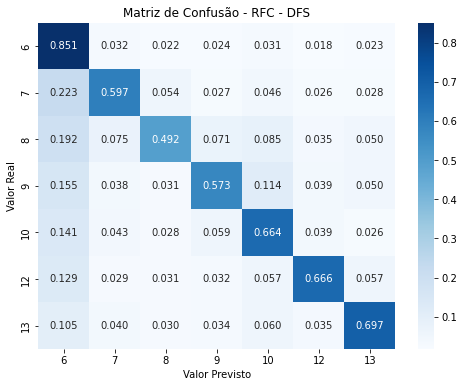

Função MatrizConfusao concluída!


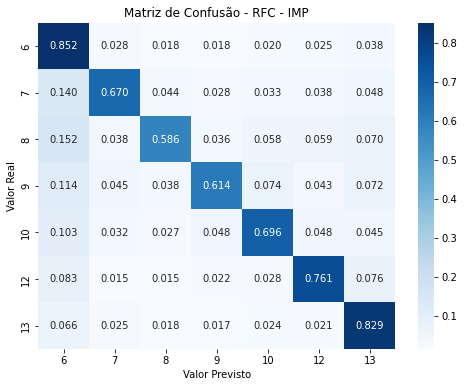

Função MatrizConfusao concluída!


In [14]:
def MatrizConfusao(YTEST, YPRED, CLASSES, tipo):
    # Computa a matriz de confusão
    matriz_confusao = confusion_matrix(YTEST, YPRED)

    # Imprime a matriz de confusão
    # print(f"Matriz de Confusão para:")
    # print(matriz_confusao)

    # Calcula a soma de cada linha da matriz de confusão
    sum_by_class = np.sum(matriz_confusao, axis=1)

    # Normaliza a matriz de confusão
    matriz_confusao_normalized = matriz_confusao / sum_by_class[:, np.newaxis]

    # Plota a matriz de confusão normalizada
    plt.figure(figsize=(8, 6))
    sns.heatmap(matriz_confusao_normalized, annot=True, fmt=".3f", 
                cmap="Blues", xticklabels=CLASSES, yticklabels=CLASSES)
    plt.title(f"Matriz de Confusão - {tipo}")
    plt.xlabel("Valor Previsto")
    plt.ylabel("Valor Real")
    plt.savefig(f"MatrizConfusao - {tipo}.png", facecolor='white')
    plt.show()
    
    print("Função MatrizConfusao concluída!")
    
classes = ['6','7','8','9','10','12','13']
TIPO = 'RFC - DFS'
MatrizConfusao(y_test.iloc[:, 0], y_pred_series1, classes, TIPO)
TIPO = 'RFC - IMP'
MatrizConfusao(y_test.iloc[:, 1], y_pred_series2, classes, TIPO)

In [15]:
# Gera e imprime o relatório de classificação, que inclui métricas como precisão, recall e F1-score
relatorio_classificacao = classification_report(y_test.iloc[:, 0], y_pred_series1)
print("\nRelatório de Classificação DFS:")
print(relatorio_classificacao)

# Gera e imprime o relatório de classificação, que inclui métricas como precisão, recall e F1-score
relatorio_classificacao = classification_report(y_test.iloc[:, 1], y_pred_series2)
print("\nRelatório de Classificação IMP:")
print(relatorio_classificacao)



Relatório de Classificação DFS:
              precision    recall  f1-score   support

         6.0       0.64      0.85      0.73      1900
         7.0       0.67      0.60      0.63       941
         8.0       0.66      0.49      0.56       826
         9.0       0.68      0.57      0.62       942
        10.0       0.65      0.66      0.66      1112
        12.0       0.76      0.67      0.71       947
        13.0       0.74      0.70      0.72      1003

    accuracy                           0.68      7671
   macro avg       0.69      0.65      0.66      7671
weighted avg       0.68      0.68      0.67      7671


Relatório de Classificação IMP:
              precision    recall  f1-score   support

         6.0       0.70      0.85      0.77      1688
         7.0       0.72      0.67      0.70       793
         8.0       0.73      0.59      0.65       781
         9.0       0.76      0.61      0.68       903
        10.0       0.76      0.70      0.73      1063
        12.0

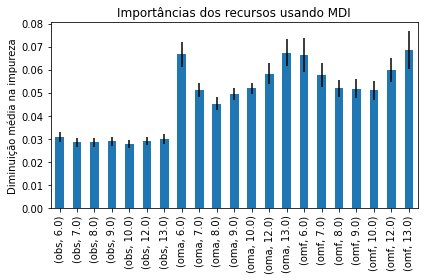

Função FeatureImportance concluída!


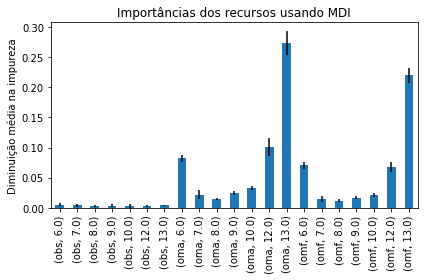

Função FeatureImportance concluída!


In [16]:
def FeatureImportance(MODELO, ATRIBUTOS):
    # Computa a importância dos atributos usando o método de diminuição da impureza (MDI)
    importances = MODELO.feature_importances_
    std = np.std([tree.feature_importances_ for tree in MODELO.estimators_], axis=0)
    forest_importances = pd.Series(importances, index=ATRIBUTOS)

    # Plota a importância dos atributos
    fig, ax = plt.subplots()
    forest_importances.plot.bar(yerr=std, ax=ax)
    ax.set_title(f"Importâncias dos recursos usando MDI")
    ax.set_ylabel("Diminuição média na impureza")
    fig.tight_layout()
    plt.savefig(f"FeatureImportance.png", facecolor='white')
    plt.show()
    
    print("Função FeatureImportance concluída!")

    
# Lista de atributos a serem usados para treinamento
#atributos = ['obs', 'oma', 'omf']

atributos = [
            (            'obs',  6.0),
            (            'obs',  7.0),
            (            'obs',  8.0),
            (            'obs',  9.0),
            (            'obs', 10.0),
            (            'obs', 12.0),
            (            'obs', 13.0),
            (            'oma',  6.0),
            (            'oma',  7.0),
            (            'oma',  8.0),
            (            'oma',  9.0),
            (            'oma', 10.0),
            (            'oma', 12.0),
            (            'oma', 13.0),
            (            'omf',  6.0),
            (            'omf',  7.0),
            (            'omf',  8.0),
            (            'omf',  9.0),
            (            'omf', 10.0),
            (            'omf', 12.0),
            (            'omf', 13.0)]

FeatureImportance(model, atributos)
FeatureImportance(model2, atributos)

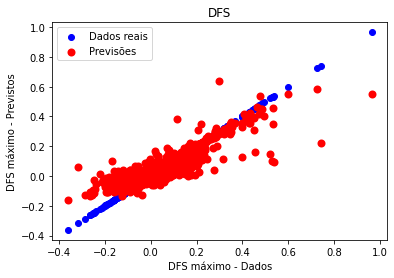

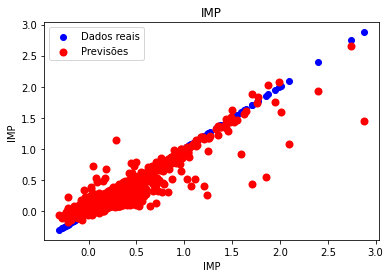

In [17]:
# Plotagem dos dados reais
plt.scatter(X_test.iloc[:, 21:28].max(axis=1), y_test.iloc[:, 2], color='blue', label='Dados reais')

# Plotagem das previsões
plt.scatter(X_test.iloc[:, 21:28].max(axis=1), y_pred2[:, 0], color='red', linewidth=2, label='Previsões')

plt.xlabel('DFS máximo - Dados')
plt.ylabel('DFS máximo - Previstos')
plt.title('DFS')
plt.legend()
plt.show()

# Plotagem dos dados reais
plt.scatter(X_test.iloc[:, 28:35].max(axis=1), y_test.iloc[:, 3], color='blue', label='Dados reais')

# Plotagem das previsões
plt.scatter(X_test.iloc[:, 28:35].max(axis=1), y_pred2[:, 1], color='red', linewidth=2, label='Previsões')

plt.xlabel('IMP')
plt.ylabel('IMP')
plt.title('IMP')
plt.legend()
plt.show()


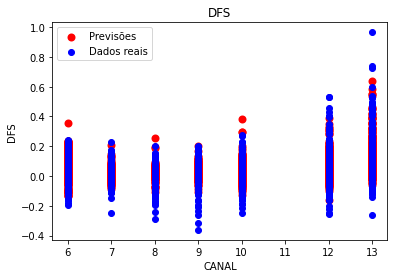

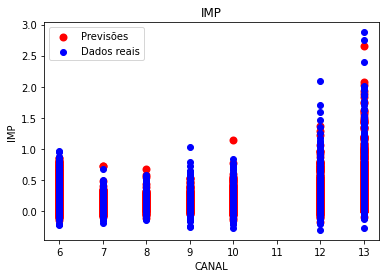

In [18]:
# Plotagem das previsões
plt.scatter(y_pred[:, 0], y_pred2[:, 0], color='red', linewidth=2, label='Previsões')

# Plotagem dos dados reais
plt.scatter(y_test.iloc[:, 0], y_test.iloc[:, 2], color='blue', label='Dados reais')
plt.xlabel('CANAL')
plt.ylabel('DFS')
plt.title('DFS')
plt.legend()
plt.show()

# Plotagem das previsões
plt.scatter(y_pred[:, 1], y_pred2[:, 1], color='red', linewidth=2, label='Previsões')

# Plotagem dos dados reais
plt.scatter(y_test.iloc[:, 1], y_test.iloc[:, 3], color='blue', label='Dados reais')
plt.xlabel('CANAL')
plt.ylabel('IMP')
plt.title('IMP')
plt.legend()
plt.show()



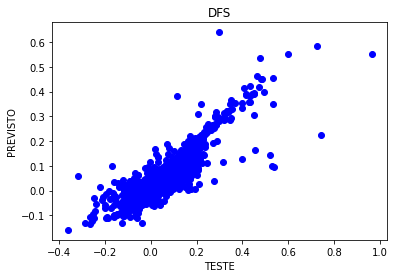

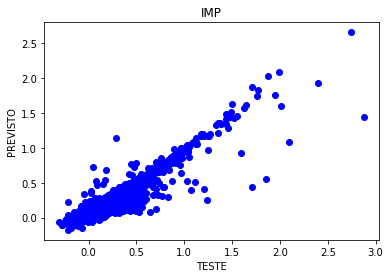

In [19]:
# Plotagem dos dados reais
plt.scatter(y_test.iloc[:, 2], y_pred2[:, 0], color='blue', label='DFS')

# Plotagem das previsões
#plt.scatter(y_pred[:, 0], y_test.iloc[:, 2], color='red', linewidth=2, label='Previsões - y_pred')

plt.xlabel('TESTE')
plt.ylabel('PREVISTO')
plt.title('DFS')
#plt.legend()
plt.show()

# Plotagem dos dados reais
plt.scatter(y_test.iloc[:, 3], y_pred2[:, 1], color='blue', label='IMP')

# Plotagem das previsões
#plt.scatter(y_pred[:, 1], y_test.iloc[:, 3], color='red', linewidth=2, label='Previsões - y_pred')

plt.xlabel('TESTE')
plt.ylabel('PREVISTO')
plt.title('IMP')
#plt.legend()
plt.show()


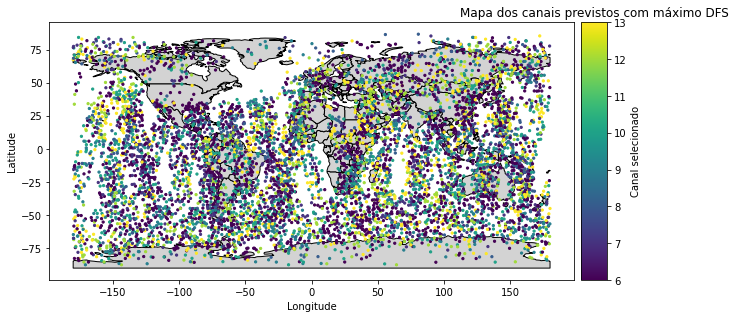

In [20]:
latitude = X_test['lat']
longitude = X_test['lon']
selecchan =  y_pred[:, 0]

# Ajustando a longitude para o intervalo -180 a 180
longitude_adj = np.where(longitude > 180, longitude - 360, longitude)

# Criando um GeoDataFrame com base nos dados ajustados
gdf = gpd.GeoDataFrame(selecchan, geometry=gpd.points_from_xy(longitude_adj, latitude), crs='EPSG:4326')

# Plotagem
fig, ax = plt.subplots(figsize=(10, 6))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)  # Adicionando eixo de cor

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(ax=ax, color='lightgrey', edgecolor='black')
scatter = gdf.plot(ax=ax, column=selecchan, cmap='viridis', markersize=5, legend=True, cax=cax)
scatter.set_xlabel('Longitude')
scatter.set_ylabel('Latitude')
cax.set_ylabel('Canal selecionado')

plt.title('Mapa dos canais previstos com máximo DFS')
plt.show()

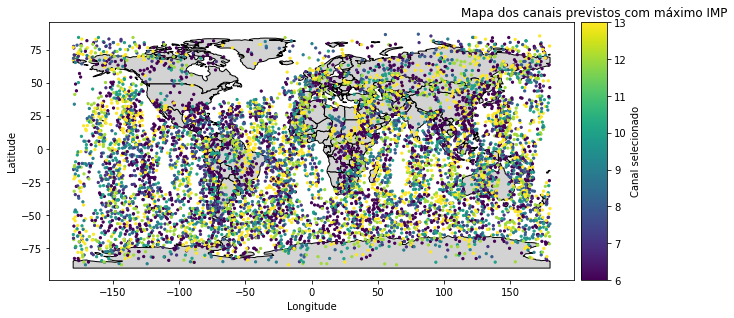

In [21]:
latitude = X_test['lat']
longitude = X_test['lon']
selecchan =  y_pred[:, 1]

# Ajustando a longitude para o intervalo -180 a 180
longitude_adj = np.where(longitude > 180, longitude - 360, longitude)

# Criando um GeoDataFrame com base nos dados ajustados
gdf = gpd.GeoDataFrame(selecchan, geometry=gpd.points_from_xy(longitude_adj, latitude), crs='EPSG:4326')

# Plotagem
fig, ax = plt.subplots(figsize=(10, 6))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)  # Adicionando eixo de cor

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(ax=ax, color='lightgrey', edgecolor='black')
scatter = gdf.plot(ax=ax, column=selecchan, cmap='viridis', markersize=5, legend=True, cax=cax)
scatter.set_xlabel('Longitude')
scatter.set_ylabel('Latitude')
cax.set_ylabel('Canal selecionado')

plt.title('Mapa dos canais previstos com máximo IMP')
plt.show()

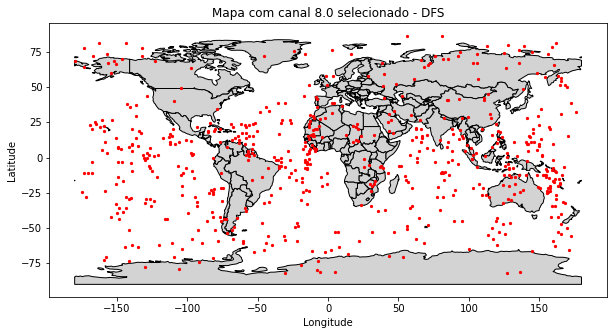

In [22]:
latitude = X_test['lat']
longitude = X_test['lon']
selecchan = y_pred[:, 0]  # Assuming y_pred contains the values you want to plot

# Ajustando a longitude para o intervalo -180 a 180
longitude_adj = np.where(longitude > 180, longitude - 360, longitude)

# Filtrando os dados com base na condição selecchan == 8.0
filtered_latitude = latitude[selecchan == 8.0]
filtered_longitude_adj = longitude_adj[selecchan == 8.0]

# Criando um GeoDataFrame com base nos dados filtrados
geometry = gpd.points_from_xy(filtered_longitude_adj, filtered_latitude)
gdf = gpd.GeoDataFrame(geometry=geometry, crs='EPSG:4326')

# Plotagem
fig, ax = plt.subplots(figsize=(10, 6))
divider = make_axes_locatable(ax)
#cax = divider.append_axes("right", size="5%", pad=0.1)  # Adicionando eixo de cor

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(ax=ax, color='lightgrey', edgecolor='black')
scatter = gdf.plot(ax=ax, color='red', markersize=5)  # Colorindo os pontos filtrados de vermelho

scatter.set_xlabel('Longitude')
scatter.set_ylabel('Latitude')

plt.title('Mapa com canal 8.0 selecionado - DFS')
plt.show()


In [23]:
# Carregue os dados do primeiro mapa
gdf1 = gpd.GeoDataFrame(geometry=gpd.points_from_xy(filtered_longitude_adj, filtered_latitude), crs='EPSG:4326')

# Carregue os dados do segundo mapa
gdf2 = gpd.GeoDataFrame(geometry=gpd.points_from_xy(filtered_longitude_adj2, filtered_latitude2), crs='EPSG:4326')

# Encontre a diferença entre os GeoDataFrames
difference = gdf1.geometry.difference(gdf2.geometry)

# Crie um novo GeoDataFrame com os pontos resultantes da diferença
result = gpd.GeoDataFrame(geometry=difference, crs='EPSG:4326')

# Plotagem
fig, ax = plt.subplots(figsize=(10, 6))
divider = make_axes_locatable(ax)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(ax=ax, color='lightgrey', edgecolor='black')

# Plotando os pontos resultantes da diferença
result.plot(ax=ax, color='red', markersize=5)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.title('Pontos Diferentes Entre os Dois Mapas')
plt.show()


NameError: name 'filtered_longitude_adj2' is not defined

In [ ]:
# Encontre a interseção entre os GeoDataFrames
intersection = gdf1.geometry.intersection(gdf2.geometry)

# Crie um novo GeoDataFrame com os pontos resultantes da interseção
result = gpd.GeoDataFrame(geometry=intersection, crs='EPSG:4326')

# Plotagem
fig, ax = plt.subplots(figsize=(10, 6))
divider = make_axes_locatable(ax)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(ax=ax, color='lightgrey', edgecolor='black')

# Plotando os pontos resultantes da interseção
result.plot(ax=ax, color='red', markersize=5)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.title('Pontos Semelhantes Entre os Dois Mapas')
plt.show()

In [ ]:
latitude = df_pivot2['lat']
longitude = df_pivot2['lon']
selecchan =  df_pivot2['canal_maior_imp']

# Ajustando a longitude para o intervalo -180 a 180
longitude_adj = np.where(longitude > 180, longitude - 360, longitude)

# Criando um GeoDataFrame com base nos dados ajustados
gdf = gpd.GeoDataFrame(selecchan, geometry=gpd.points_from_xy(longitude_adj, latitude), crs='EPSG:4326')

# Plotagem
fig, ax = plt.subplots(figsize=(10, 6))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)  # Adicionando eixo de cor

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(ax=ax, color='lightgrey', edgecolor='black')
scatter = gdf.plot(ax=ax, column='canal_maior_imp', cmap='viridis', markersize=5, legend=True, cax=cax)
scatter.set_xlabel('Longitude')
scatter.set_ylabel('Latitude')
cax.set_ylabel('Impacto')

plt.title('Mapa de Impacto da Previsão do Tempo')
plt.show()